In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
loan_data_file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv"
df = pd.read_csv(loan_data_file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.duplicated().sum()

0

In [6]:

df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:

df[' self_employed'].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [9]:

df.columns = df.columns.str.strip()

In [10]:

df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
df['education'].value_counts().keys()

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')

In [12]:

df['self_employed'].value_counts().keys()

Index([' Yes', ' No'], dtype='object', name='self_employed')

In [13]:
df['loan_status'].value_counts().keys()

Index([' Approved', ' Rejected'], dtype='object', name='loan_status')

In [14]:
cat_columns = ['education','self_employed','loan_status']
cat_columns

['education', 'self_employed', 'loan_status']

In [15]:

df2 = pd.read_csv(loan_data_file_path, skipinitialspace=True,)
df2.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:

df2.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [17]:
clean_data = pd.get_dummies(df2,drop_first="if_binary").astype(int)

In [18]:
x = clean_data.drop("loan_status_Rejected",axis='columns')
y = clean_data[['loan_status_Rejected']]

In [19]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_transformed = std.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:

x_transformed.shape

(4269, 12)

In [22]:
x_train,x_test ,y_train, y_test = train_test_split(x_transformed,y,test_size=0.15)

In [23]:
from tensorflow.keras.layers import Dense  # hidden layer
from tensorflow.keras.models import Sequential

In [24]:
ann_model = Sequential()

ann_model.add(Dense(units=68,activation='relu',input_dim=x_train.shape[1]))
ann_model.add(Dense(units=45,activation='relu'))
ann_model.add(Dense(units=28,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))

ann_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
ann_model.summary()

c:\Users\tumha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           884 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         3,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,306 (20.73 KB)

 Trainable params: 5,306 (20.73 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
ann_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7348 - loss: 0.4884
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9293 - loss: 0.2107
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9386 - loss: 0.1766
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9448 - loss: 0.1427
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9441 - loss: 0.1453
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9631 - loss: 0.1141
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9599 - loss: 0.1180
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9569 - loss: 0.1135
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9613 - loss: 0.0963
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9648 - loss: 0.0942


In [26]:
history = ann_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
# validation data == test data

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9708 - loss: 0.0822 - val_accuracy: 0.9516 - val_loss: 0.1096
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.0705 - val_accuracy: 0.9610 - val_loss: 0.0959
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9781 - loss: 0.0735 - val_accuracy: 0.9532 - val_loss: 0.0883
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9786 - loss: 0.0648 - val_accuracy: 0.9516 - val_loss: 0.1022
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9769 - loss: 0.0668 - val_accuracy: 0.9641 - val_loss: 0.0884
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9777 - loss: 0.0621 - val_accuracy: 0.9641 - val_loss: 0.0846
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9835 - loss: 0.0470 - val_accuracy: 0.9501 - val_loss: 0.1124
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0524 - val_accuracy: 0

In [27]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.965821,0.089564,0.951638,0.109638
1,0.975193,0.077807,0.960998,0.095923
2,0.976020,0.073826,0.953198,0.088278
3,0.977674,0.068176,0.951638,0.102155
4,0.976020,0.064693,0.964119,0.088414
5,0.977398,0.060208,0.964119,0.084625
6,0.979327,0.053603,0.950078,0.112440
7,0.982084,0.050216,0.962559,0.082581
8,0.981533,0.048698,0.954758,0.095645
9,0.986218,0.043795,0.956318,0.108736


<Axes: >

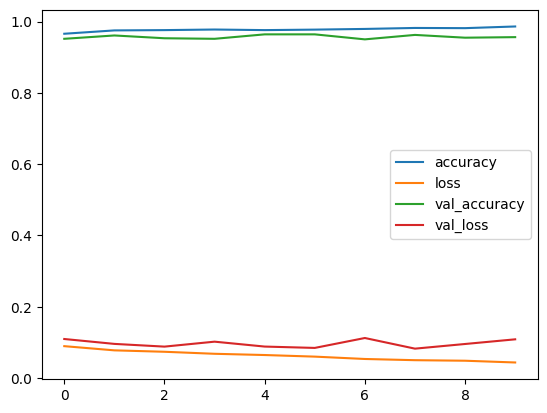

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
pred = ann_model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [30]:

x_test.shape

(641, 12)

In [31]:
pred.shape

(641, 1)

In [32]:
prediciont = (pred>0.5).astype(int).ravel()
# probabilities
# if probability > 0.5:
#     1
# else:
#   0
prediciont.shape

(641,)

In [33]:
prediciont

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [34]:
y_test['prediction'] = prediciont

In [35]:

y_test.head(40)

,loan_status_Rejected,prediction
4050,1,1
1517,1,1
182,0,0
3736,0,0
3095,0,0
1051,0,0
4068,1,1
2652,0,0
562,1,1
2081,0,0


In [36]:

# classification report
# confusion matrix
# import joblib , .lb,pt,
ann_model.save('loan_approval_model.h5')